In [ ]:
!git clone https://github.com/ipsita-23/Dropout-prediction-for-traditional-and-e-learning-mode.git


Cloning into 'Dropout-prediction-for-traditional-and-e-learning-mode'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 0), reused 30 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 92.70 KiB | 3.56 MiB/s, done.


In [ ]:
%cd Dropout-prediction-for-traditional-and-e-learning-mode


/content/Dropout-prediction-for-traditional-and-e-learning-mode


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=4e7354553cbd8ca72fbdcbb14d80c26121ad61133b222423df97a90d4baf003e
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


In [ ]:
!python eda/run_eda.py


2025-12-10 15:55:10,732 - INFO - ============================================================
2025-12-10 15:55:10,732 - INFO - STARTING EXPLORATORY DATA ANALYSIS
2025-12-10 15:55:10,732 - INFO - ============================================================
2025-12-10 15:55:10,753 - INFO - Dataset loaded: (5000, 5)
2025-12-10 15:55:10,753 - INFO - Performing univariate analysis...
2025-12-10 15:55:13,281 - INFO -   ✓ attendance_percentage: 20 outliers (0.40%)
2025-12-10 15:55:15,260 - INFO -   ✓ academic_score: 12 outliers (0.24%)
2025-12-10 15:55:17,205 - INFO -   ✓ indiscipline_count: 238 outliers (4.76%)
2025-12-10 15:55:20,027 - INFO -   ✓ online_engagement_score: 17 outliers (0.34%)
2025-12-10 15:55:20,028 - INFO - Performing bivariate analysis...
2025-12-10 15:55:20,356 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/content/Dropout

   attendance_percentage  academic_score  indiscipline_count  \
0                  84.93            6.22                2.63   
1                 100.00            8.03                0.04   
2                  79.84            2.67                1.13   
3                  56.84            3.68                1.22   
4                  64.11            6.72                1.87   

   online_engagement_score  dropout  
0                    42.20        0  
1                    55.48        0  
2                    90.41        0  
3                    54.26        1  
4                    54.99        0  


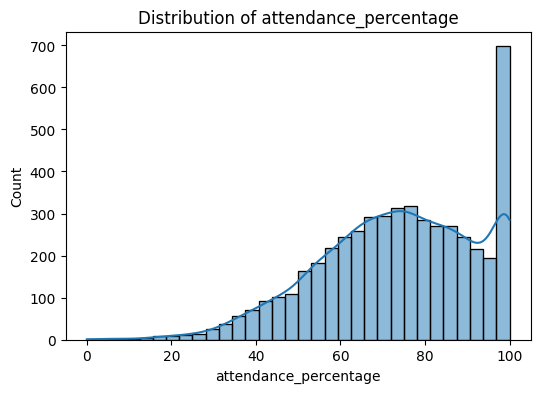

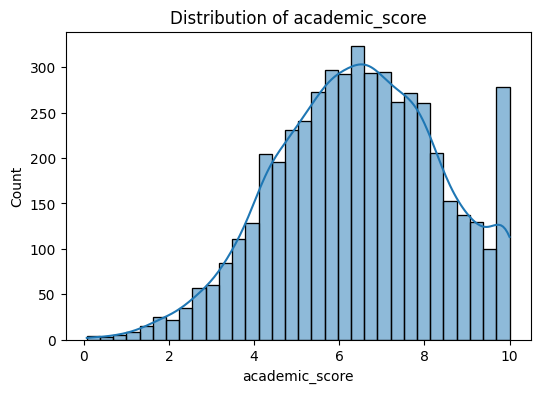

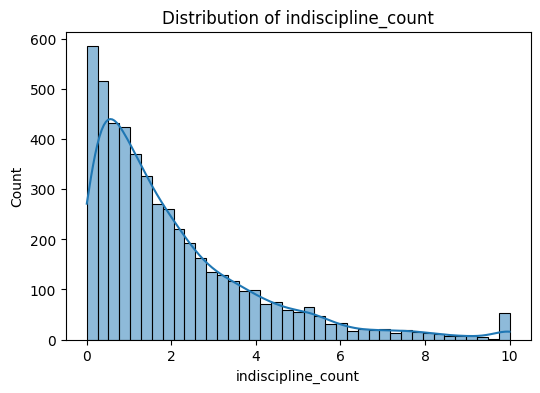

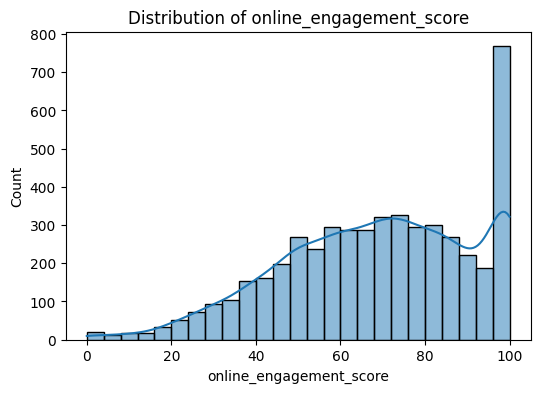

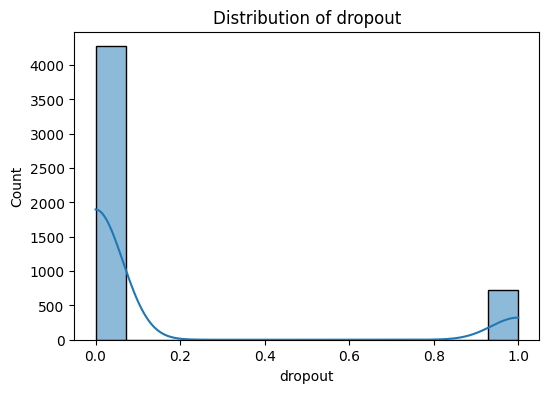

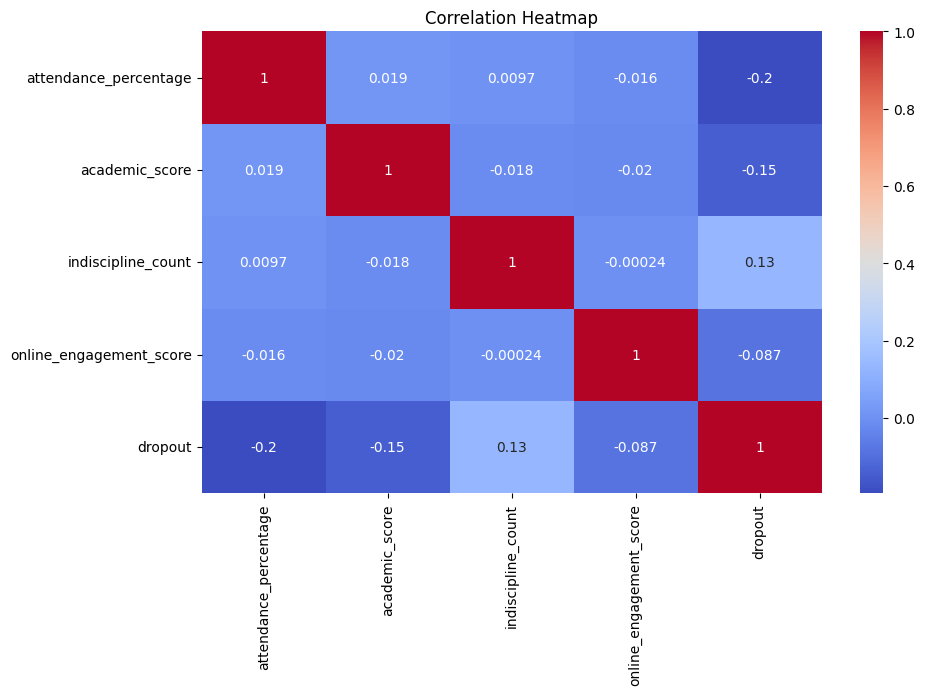

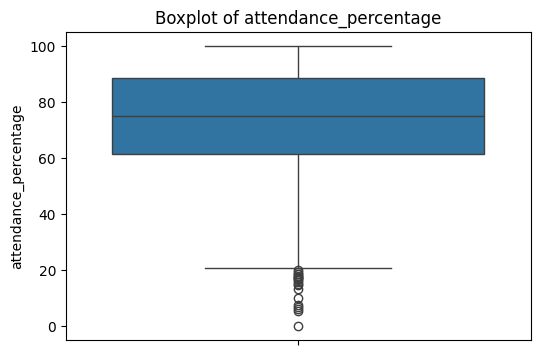

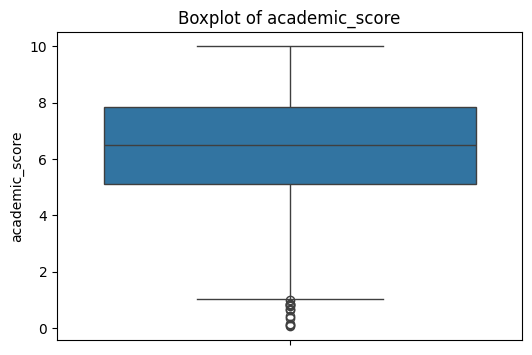

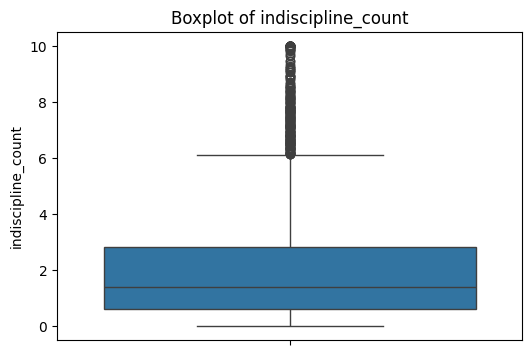

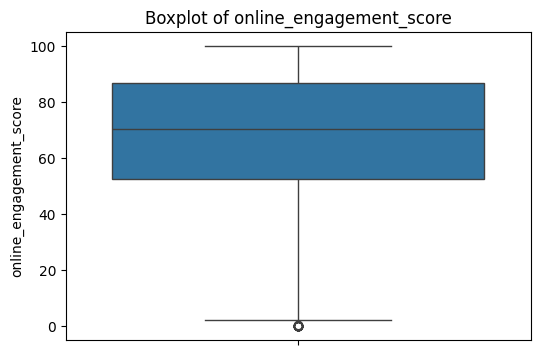

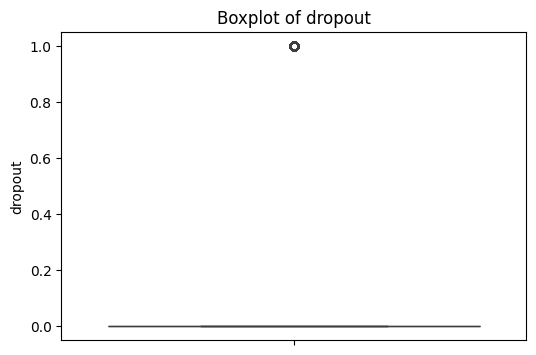

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Dropout-prediction-for-traditional-and-e-learning-mode/data/dataset.csv")   # change path
print(df.head())
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


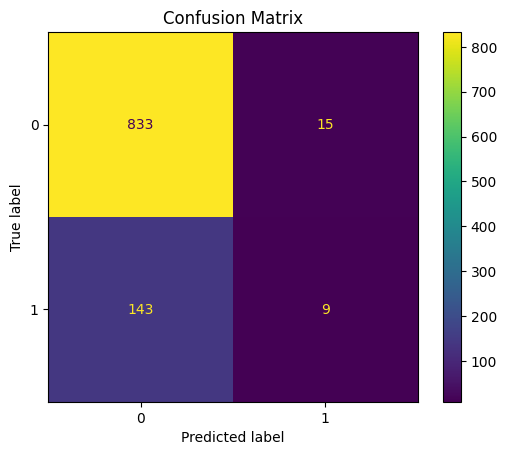

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Dropout-prediction-for-traditional-and-e-learning-mode/data/dataset.csv")   # change filename

X = df[['attendance_percentage', 'academic_score', 'indiscipline_count',
        'online_engagement_score']]
y = df['dropout']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

   attendance_percentage  academic_score  indiscipline_count  \
0                  84.93            6.22                2.63   
1                 100.00            8.03                0.04   
2                  79.84            2.67                1.13   
3                  56.84            3.68                1.22   
4                  64.11            6.72                1.87   

   online_engagement_score  dropout  
0                    42.20        0  
1                    55.48        0  
2                    90.41        0  
3                    54.26        1  
4                    54.99        0  
Before SMOTE: [3418  582]
After SMOTE: [3418 3418]


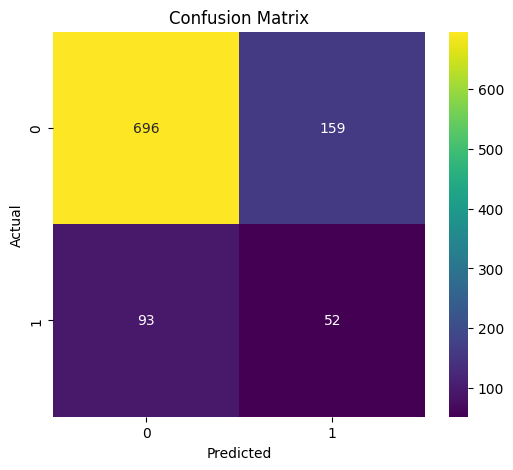


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       855
           1       0.25      0.36      0.29       145

    accuracy                           0.75      1000
   macro avg       0.56      0.59      0.57      1000
weighted avg       0.79      0.75      0.77      1000



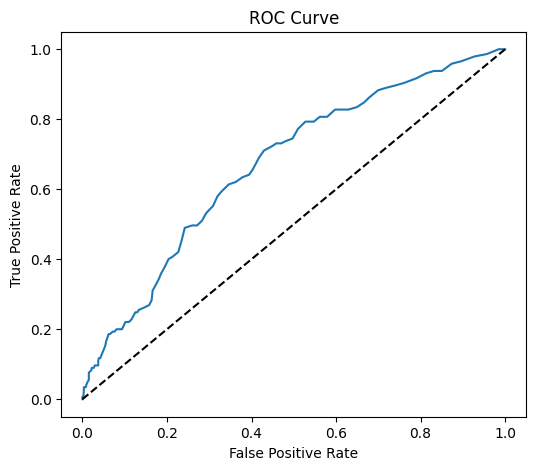

AUC Score: 0.6685743093365596


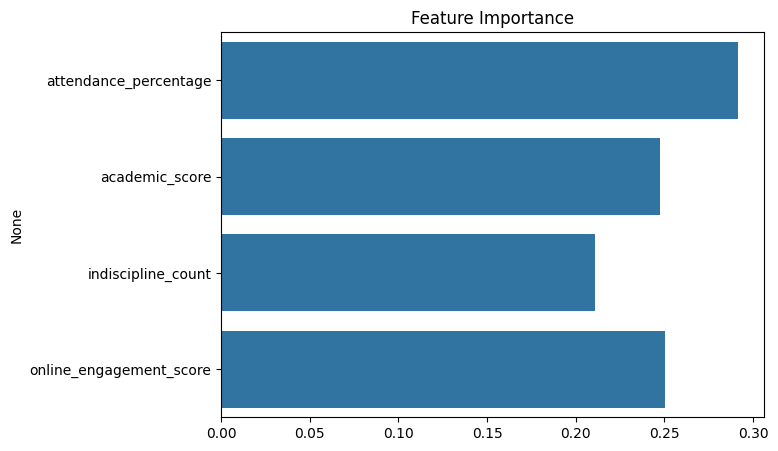

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE


data = pd.read_csv("/content/Dropout-prediction-for-traditional-and-e-learning-mode/data/dataset.csv")
df = data.copy()
print(df.head())

X = df[['attendance_percentage', 'academic_score', 'indiscipline_count', 'online_engagement_score']]
y = df['dropout']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_res))

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()
